In [1]:
%matplotlib inline
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

Executing <Handle IOLoop.add_future.<locals>.<lambda>(<Future finis...queues.py:248>) at f:\project\mygithub\tq\venv\lib\site-packages\tornado\ioloop.py:688 created at f:\project\mygithub\tq\venv\lib\site-packages\tornado\concurrent.py:184> took 0.969 seconds


<AxesSubplot:xlabel='log(HR) (95% CI)'>

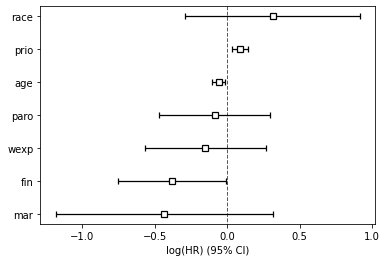

Executing <Handle IOLoop.add_future.<locals>.<lambda>(<Future finis...queues.py:248>) at f:\project\mygithub\tq\venv\lib\site-packages\tornado\ioloop.py:688 created at f:\project\mygithub\tq\venv\lib\site-packages\tornado\concurrent.py:184> took 0.234 seconds


In [2]:
rossi = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')
cph.plot()

<AxesSubplot:>

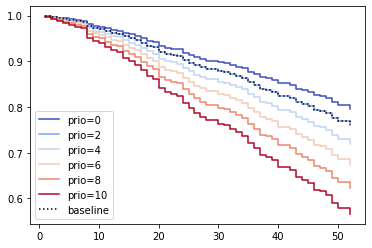

Executing <Handle IOLoop.add_future.<locals>.<lambda>(<Future finis...queues.py:248>) at f:\project\mygithub\tq\venv\lib\site-packages\tornado\ioloop.py:688 created at f:\project\mygithub\tq\venv\lib\site-packages\tornado\concurrent.py:184> took 0.156 seconds


In [3]:
cph.plot_partial_effects_on_outcome(covariates='prio', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm')

<AxesSubplot:>

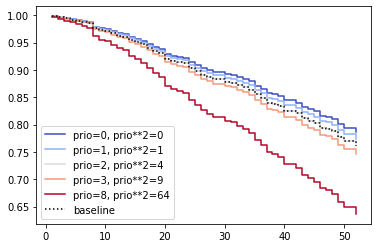

Executing <Handle IOLoop.add_future.<locals>.<lambda>(<Future finis...queues.py:248>) at f:\project\mygithub\tq\venv\lib\site-packages\tornado\ioloop.py:688 created at f:\project\mygithub\tq\venv\lib\site-packages\tornado\concurrent.py:184> took 0.204 seconds


In [4]:
rossi['prio**2'] = rossi['prio'] ** 2

cph.fit(rossi, 'week', 'arrest')

cph.plot_partial_effects_on_outcome(
    covariates=['prio', 'prio**2'],
    values=[
        [0, 0],
        [1, 1],
        [2, 4],
        [3, 9],
        [8, 64],
    ],
    cmap='coolwarm')

<AxesSubplot:>

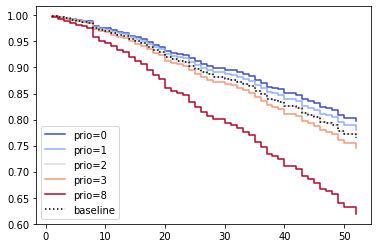

Executing <Handle IOLoop.add_future.<locals>.<lambda>(<Future finis...queues.py:248>) at f:\project\mygithub\tq\venv\lib\site-packages\tornado\ioloop.py:688 created at f:\project\mygithub\tq\venv\lib\site-packages\tornado\concurrent.py:184> took 0.203 seconds


In [5]:
cph.fit(rossi, 'week', 'arrest', formula="prio + I(prio**2)")

cph.plot_partial_effects_on_outcome(
    covariates=['prio'],
    values=[0, 1, 2, 3, 8],
    cmap='coolwarm')